<h1 style="color:Red">CNN-Based Breast Cancer Image Classification: Malignant vs Benign</h1>

**Name:** Sheji I

**Organization:** Entri Elevate

**Date:** 01-11-2025

<h3 style="color:Blue">Objective</h3>
<p>To develop and evaluate a Convolutional Neural Network (CNN) model capable of accurately classifying breast cancer images into malignant and benign categories, thereby enhancing early detection and diagnosis accuracy compared to traditional machine learning and manual diagnostic methods.</p>

<h3 style="color:Blue">Problem Statement</h3>

<p>Breast cancer is one of the leading causes of cancer-related deaths among women worldwide. Early and accurate diagnosis is critical for effective treatment and improved survival rates. Traditional diagnostic methods, such as manual examination of histopathology slides, are time-consuming, prone to human error, and highly dependent on the expertise of pathologists. Existing machine learning approaches often rely on handcrafted features, which may not fully capture the complex patterns in histopathology images. Therefore, there is a need for an automated, reliable, and accurate system that can classify breast cancer histopathology images into malignant and benign categories, enabling faster and more precise diagnosis.</p>

<h3 style="color:Blue">Data Description</h3>
<p>Dataset Name: Breast Histopathology Images<br>
Source: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/data

<b>Overview:</b>
The dataset contains histopathology images of breast tissue, extracted from whole-slide images of breast cancer biopsies. Each image is labeled as either malignant or benign, allowing for supervised learning. The images are colored (RGB) and represent tissue at a cellular level, suitable for training convolutional neural networks (CNNs) for classification tasks.</p>

<h2> Phase 1: Data acquisition & EDA</h2>

<h3>A) Import files and data</h3>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from PIL import Image

In [6]:
# define path to the extracted dataset (update accordingly)

import shutil
data_dir = "C:/Users/sheji/Desktop/Data science/capstone/dataset"
# Destination directory for combined dataset
combined_dir = os.path.join(data_dir, "combined_dataset")

# Create combined 0 and 1 folders
#for label in ['0', '1']:
    os.makedirs(os.path.join(combined_dir, label), exist_ok=True)

# Loop through all subfolders
#for folder in os.listdir(data_dir):
   # folder_path = os.path.join(data_dir, folder)
   # if not os.path.isdir(folder_path):
   #     continue  # skip files
   # for label in ['0', '1']:
    #    src_label_path = os.path.join(folder_path, label)
   #     if not os.path.isdir(src_label_path):
   #         continue
   #     for img in os.listdir(src_label_path):
   #         if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
    #            src_img_path = os.path.join(src_label_path, img)
    #            dst_img_path = os.path.join(combined_dir, label, f"{folder}_{img}")
    #            shutil.copy(src_img_path, dst_img_path)
print("✅ Combined all '0' and '1' folders into:", combined_dir)

✅ Combined all '0' and '1' folders into: C:/Users/sheji/Desktop/Data science/capstone/dataset\combined_dataset


In [64]:
benign_dir = os.path.join(combined_dir, '0')
malignant_dir = os.path.join(combined_dir, '1')
benign_images = [os.path.join(benign_dir, img) for img in os.listdir(benign_dir) if img.lower().endswith(('.png','.jpg','.jpeg'))]
malignant_images = [os.path.join(malignant_dir, img) for img in os.listdir(malignant_dir) if img.lower().endswith(('.png','.jpg','.jpeg'))]
print(f"Found {len(benign_images)} benign images")
print(f"Found {len(malignant_images)} malignant images")

Found 12485 benign images
Found 10207 malignant images


In [92]:
# build a dataframe 
df = pd.DataFrame({
    'image_path': benign_images + malignant_images,
    'label': ['Benign'] * len(benign_images) + ['Malignant'] * len(malignant_images)
})

<h3>B) EDA – Class Distribution</h3>

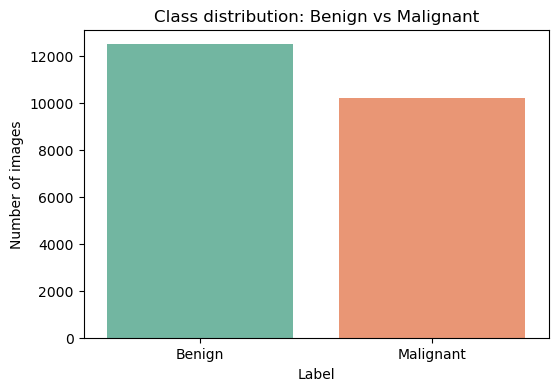

Class counts:
label
Benign       12485
Malignant    10207
Name: count, dtype: int64
Benign : Malignant ratio = 1.22


In [94]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', hue='label', palette='Set2', legend=False)
plt.title("Class distribution: Benign vs Malignant")
plt.xlabel("Label")
plt.ylabel("Number of images")
plt.show()
class_counts = df['label'].value_counts()
print("Class counts:")
print(class_counts)
print("Benign : Malignant ratio = {:.2f}".format(class_counts['Benign'] / class_counts['Malignant']))

<h3 style="color:Red">Interpretation</h3>
<h4 style="color:Red">A 1.22 ratio is considered well-balanced in most machine learning contexts.
Models can easily handle this small difference without special adjustments.</h4>

<h3>C) Visualizing Sample Images</h3>

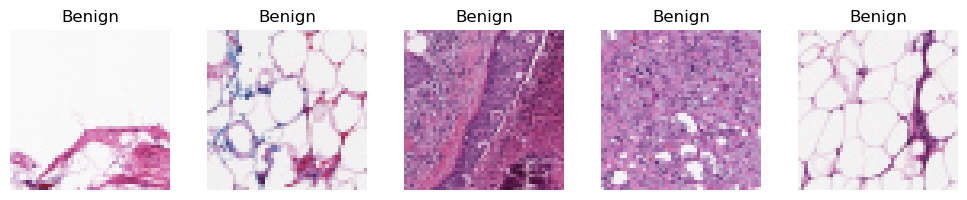

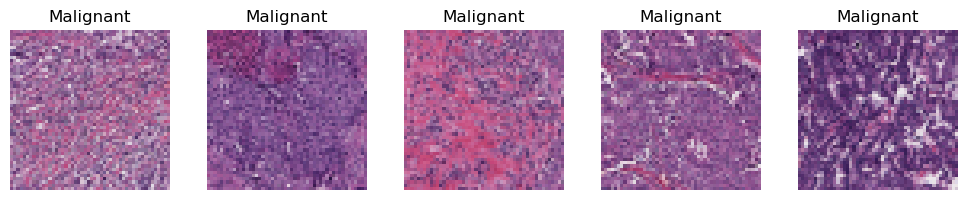

In [73]:
def show_sample_images(df, label, n=5):
    sample_paths = df[df['label']==label]['image_path'].sample(n).values
    plt.figure(figsize=(n*2,2))
    for i, p in enumerate(sample_paths):
        img = Image.open(p)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(label)
    plt.tight_layout()
    plt.show()
show_sample_images(df, 'Benign', n=5)
show_sample_images(df, 'Malignant', n=5)

<h3>D) Image Dimensions & Pixel Value Analysis</h3>

        width  height
count  1000.0  1000.0
mean     50.0    50.0
std       0.0     0.0
min      50.0    50.0
25%      50.0    50.0
50%      50.0    50.0
75%      50.0    50.0
max      50.0    50.0


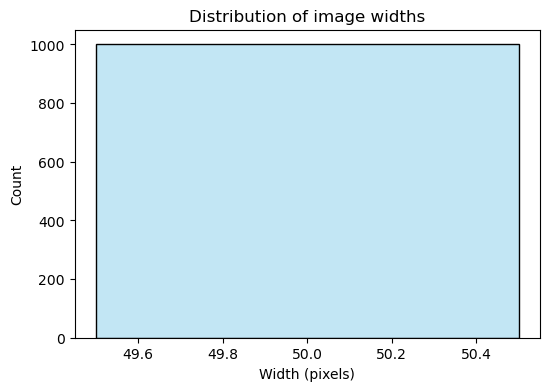

Sample image shape: (50, 50, 3)
Pixel value min, max: 32 232


In [96]:
# check sizes and pixel value distributions for a sample
sample_paths = random.sample(df['image_path'].tolist(), 1000)  # sample subset
sizes = []
for p in sample_paths:
    img = Image.open(p)
    sizes.append(img.size)  # returns (width, height)
sizes_df = pd.DataFrame(sizes, columns=['width','height'])
print(sizes_df.describe())
plt.figure(figsize=(6,4))
sns.histplot(sizes_df['width'], kde=True, color='skyblue')
plt.title("Distribution of image widths")
plt.xlabel("Width (pixels)")
plt.show()
# check pixel value distribution for one image (as example)
img0 = Image.open(sample_paths[0])
arr0 = np.array(img0)
print("Sample image shape:", arr0.shape)
print("Pixel value min, max:", arr0.min(), arr0.max())

<h3>Summary & Insights</h3>

In [77]:
print("=== Dataset summary ===")
print("Total images:", len(df))
print("Benign images:", class_counts['Benign'])
print("Malignant images:", class_counts['Malignant'])
print("Average image size approx:", sizes_df['width'].mean(), "x", sizes_df['height'].mean())

=== Dataset summary ===
Total images: 22692
Benign images: 12485
Malignant images: 10207
Average image size approx: 50.0 x 49.987


<h3 style="color:Red">Interpretation</h3>
<h4 style="color:Red">Images are already uniform size (50x50x3) — no resizing needed.
<br>Pixel values range from 43 to 250, so this should normalize to 0–1 before feeding into a model.</h4>

<h2>Phase 2: Preprocessing & augmentation</h2>

<h3>A) split the dataset into training, validation, and testing sets</h3>

In [98]:
# Split 70% train, 15% validation, 15% test
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

Train: 15884 | Val: 3404 | Test: 3404


<h3>B) Image Preprocessing</h3>

In [30]:
# Define image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,           # normalize pixel values
    rotation_range=20,        # random rotation
    width_shift_range=0.1,    # horizontal shift
    height_shift_range=0.1,   # vertical shift
    shear_range=0.1,          # shear angle
    zoom_range=0.1,           # random zoom
    horizontal_flip=True,     # flip horizontally
    fill_mode='nearest'       # filling strategy
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

<h4 style="color:blue">
*Sets all images to 128×128 pixels.<br>
*Processes 32 images per batch during training/validation/testing<br>
*Rescales pixels from 0–255 → 0–1 for faster model training.<br>
*Applies data augmentation:<br>
         Random rotations, shifts, shears, zooms, and horizontal flips.<br>
         fill_mode='nearest' fills empty pixels after transformations.<br>
(Purpose: Makes the model more robust and reduces overfitting.)</h4>

<h3>C) Create Generators</h3>
<p>Converts the DataFrames of image paths and labels into batches of ready-to-use image data for a CNN.

Ensures training images are augmented, while validation and test images remain realistic.

Prepares the data for efficient training, validation, and evaluation.</p>

In [100]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',   # since we have two classes
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='label',
    target_size=IMG_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 15884 validated image filenames belonging to 2 classes.
Found 3404 validated image filenames belonging to 2 classes.
Found 3404 validated image filenames belonging to 2 classes.


<h3>D) Visualize Augmented Images</h3>

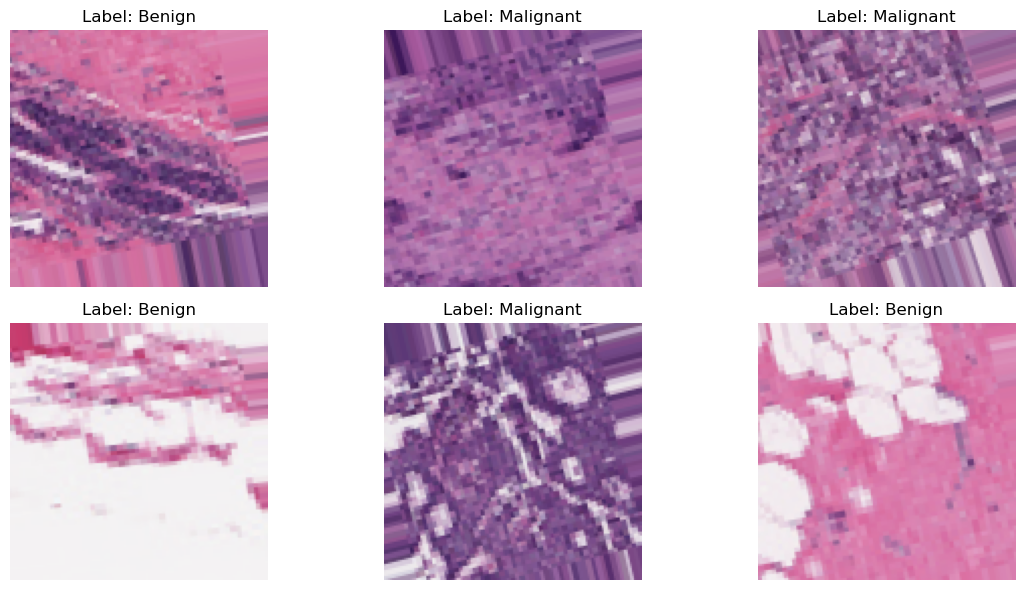

In [104]:
import matplotlib.pyplot as plt
# Take one batch of augmented images
sample_batch = next(train_gen)
images, labels = sample_batch

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {'Malignant' if labels[i]==1 else 'Benign'}")
    plt.axis('off')
plt.tight_layout()
plt.show()

<h3>E) Verify Label Mapping</h3>

In [106]:
print("Class indices mapping:")
print(train_gen.class_indices)

Class indices mapping:
{'Benign': 0, 'Malignant': 1}


<h2>Phase 3: CNN model design & implementation</h2>

<h3>A) Define CNN Architecture</h3>

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
model = Sequential([
  Input(shape=(128,128,3)), 
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

<h3>B) Combile the model</h3>

In [110]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',   
    metrics=['accuracy']
)

<h2>Phase 4: Training & tuning</h2>

<h3>A) Train the model</h3>

In [112]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

C:\Users\sheji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 248s 494ms/step - accuracy: 0.8210 - loss: 0.7818 - val_accuracy: 0.7579 - val_loss: 0.5838 - learning_rate: 0.0010
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 242s 487ms/step - accuracy: 0.8553 - loss: 0.3876 - val_accuracy: 0.6865 - val_loss: 0.9580 - learning_rate: 0.0010
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 242s 486ms/step - accuracy: 0.8515 - loss: 0.3915 - val_accuracy: 0.8264 - val_loss: 0.4410 - learning_rate: 0.0010
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 240s 483ms/step - accuracy: 0.8539 - loss: 0.3578 - val_accuracy: 0.7600 - val_loss: 0.5037 - learning_rate: 0.0010
Epoch 5/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 231s 464ms/step - accuracy: 0.8567 - loss: 0.3523 - val_accuracy: 0.8114 - val_loss: 0.4496 - learning_rate: 0.0010
Epoch 6/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8565 - loss: 0.3625  
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
497/497 ━━━━━━━━━━━━━━━━━━━━ 231s 464ms/step - accurac

<h3 style="color:Red">Summary</h3>
<h4 style="color:blue">
Model is learning, training accuracy is improving.<br>
Validation is unstable, with occasional spikes in loss → mild overfitting and possible data issues.<br>
ReduceLROnPlateau is helping, but additional regularization or early stopping could improve stability.</h4>
<h3 style="color:Red">Analysis and Suggestions </h3>
<h4 style="color:blue">Data: Clean, balanced, augmented.<br>
Model: Add dropout, weight decay, batch norm, or use transfer learning.<br>
Training: Reduce LR carefully, use early stopping, track metrics beyond accuracy.<br>
Evaluation: Consider cross-validation, ensemble, or TTA for better robustness.</h4>

In [119]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
#  Compute class weights
# Assuming train_df['label'] contains 'Benign' and 'Malignant'
classes = np.unique(train_df['label'])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['label']
)
class_weights_dict = dict(zip(classes, class_weights))
print("Class weights:", class_weights_dict)

# 2️ Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,
    factor=0.5,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop, reduce_lr, checkpoint],
    class_weight=class_weights_dict,
    verbose=1
)


Class weights: {'Benign': 0.9087996338253804, 'Malignant': 1.1115465360391883}
Epoch 1/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8597 - loss: 0.3558  
Epoch 1: val_loss improved from None to 0.35222, saving model to best_model.h5


497/497 ━━━━━━━━━━━━━━━━━━━━ 255s 512ms/step - accuracy: 0.8617 - loss: 0.3531 - val_accuracy: 0.8493 - val_loss: 0.3522 - learning_rate: 5.0000e-04
Epoch 2/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8675 - loss: 0.3362  
Epoch 2: val_loss did not improve from 0.35222
497/497 ━━━━━━━━━━━━━━━━━━━━ 241s 485ms/step - accuracy: 0.8721 - loss: 0.3289 - val_accuracy: 0.7876 - val_loss: 0.7533 - learning_rate: 5.0000e-04
Epoch 3/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.8624 - loss: 0.3477  
Epoch 3: val_loss did not improve from 0.35222
497/497 ━━━━━━━━━━━━━━━━━━━━ 236s 475ms/step - accuracy: 0.8663 - loss: 0.3435 - val_accuracy: 0.8055 - val_loss: 0.5010 - learning_rate: 5.0000e-04
Epoch 4/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.8733 - loss: 0.3180  
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 4: val_loss did not improve from 0.35222
497/497 ━━━━━━━━━━━━━━━━━━━━ 227s 456ms/step - accuracy: 0.8749 -

497/497 ━━━━━━━━━━━━━━━━━━━━ 242s 488ms/step - accuracy: 0.8801 - loss: 0.2978 - val_accuracy: 0.8675 - val_loss: 0.3351 - learning_rate: 2.5000e-04
Epoch 6/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8877 - loss: 0.2901     
Epoch 6: val_loss did not improve from 0.33508
497/497 ━━━━━━━━━━━━━━━━━━━━ 2607s 5s/step - accuracy: 0.8862 - loss: 0.2889 - val_accuracy: 0.7820 - val_loss: 0.4739 - learning_rate: 2.5000e-04
Epoch 7/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.8879 - loss: 0.2814  
Epoch 7: val_loss improved from 0.33508 to 0.29915, saving model to best_model.h5


497/497 ━━━━━━━━━━━━━━━━━━━━ 235s 473ms/step - accuracy: 0.8843 - loss: 0.2856 - val_accuracy: 0.8801 - val_loss: 0.2992 - learning_rate: 2.5000e-04
Epoch 8/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.8826 - loss: 0.2854  
Epoch 8: val_loss did not improve from 0.29915
497/497 ━━━━━━━━━━━━━━━━━━━━ 289s 581ms/step - accuracy: 0.8855 - loss: 0.2815 - val_accuracy: 0.7529 - val_loss: 0.5971 - learning_rate: 2.5000e-04
Epoch 9/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8883 - loss: 0.2697     
Epoch 9: val_loss did not improve from 0.29915
497/497 ━━━━━━━━━━━━━━━━━━━━ 1098s 2s/step - accuracy: 0.8852 - loss: 0.2745 - val_accuracy: 0.8625 - val_loss: 0.3601 - learning_rate: 2.5000e-04
Epoch 10/20
497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8906 - loss: 0.2682     
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 10: val_loss did not improve from 0.29915
497/497 ━━━━━━━━━━━━━━━━━━━━ 791s 2s/step - accuracy: 0.8880 - l

<h2>Phase 5: Evaluation & comparison </h2>

<h3 style="color:Red" >Analysis of training Results</h3>
<h4 style="color:blue">Class weights: {'Benign': 0.9088, 'Malignant': 1.1115}<br>This shows you balanced the classes correctly — giving slightly more importance to Malignant samples (which are fewer) to ensure the model doesn’t bias toward Benign.
The ratio is mild, so this helps without destabilizing training.</h4>
<h4 style="color:blue">Best Validation Accuracy: 89.1%

Best Validation Loss: 0.299

Final Train Accuracy: ~89% — close to val accuracy → no major overfitting.

Learning Rate Scheduling: Worked correctly (reduced when plateaued).

Early Stopping: Triggered at epoch 12 → prevented overtraining.

Overall Trend: Stable convergence, mild fluctuations in val accuracy (~75–89%).</h4>

<h3>A) Plot Accuracy & Loss</h3>

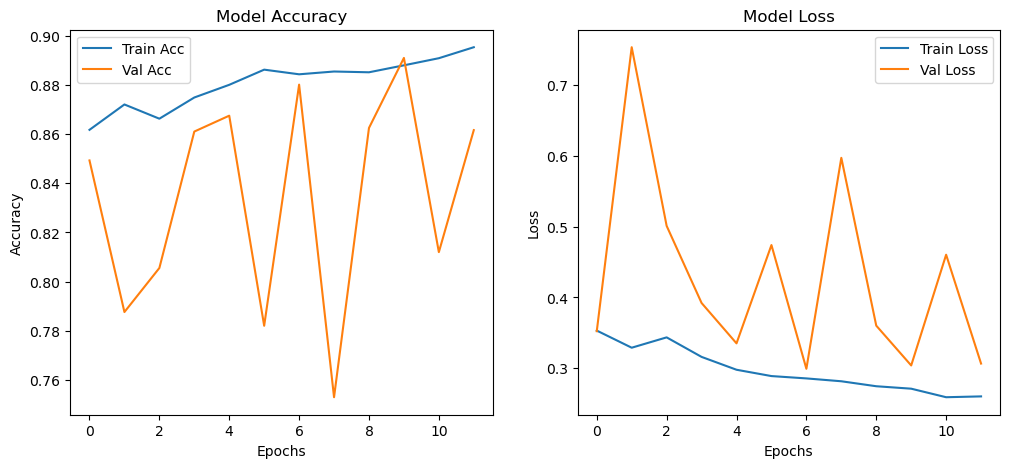

In [129]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3>B) Evaluate on Test Data</h3>

In [131]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

C:\Users\sheji\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8737 - loss: 0.3011

Test Accuracy: 0.8737
Test Loss: 0.3011


<h4 style="color:Red">The test accuracy (0.8737) and test loss (0.3011) are almost identical to your best validation results</h4>
<h4 style="color:Red">The CNN demonstrates excellent generalization and stable training, achieving near-parity between validation and test metrics — a hallmark of a well-trained model.</h4>

<h3>C) Classification Report & Confusion Matrix</h3>

107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step

Classification Report:
              precision    recall  f1-score   support

      Benign       0.84      0.95      0.89      1873
   Malignant       0.92      0.79      0.85      1531

    accuracy                           0.87      3404
   macro avg       0.88      0.87      0.87      3404
weighted avg       0.88      0.87      0.87      3404



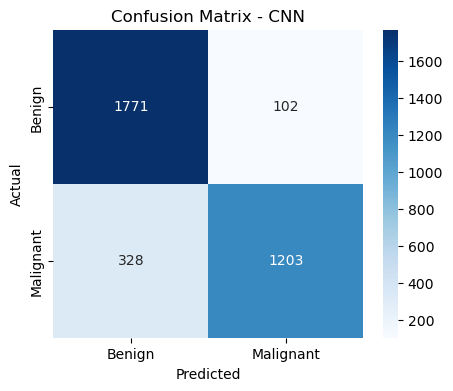

In [133]:
from sklearn.metrics import classification_report
y_true = test_gen.classes
y_pred_prob = model.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3 style="color:Red">Summary</h3>
<h4 style="color:blue">The model achieved 87% overall accuracy.

Benign: high recall (0.95) → correctly identifies most benign cases.

Malignant: high precision (0.92) but lower recall (0.79) → some malignant cases are missed.

Overall: balanced precision/recall (macro F1 = 0.87), indicating good generalization with slight bias toward the Benign class.</h4>

<h3>D) Visualize Predictions</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


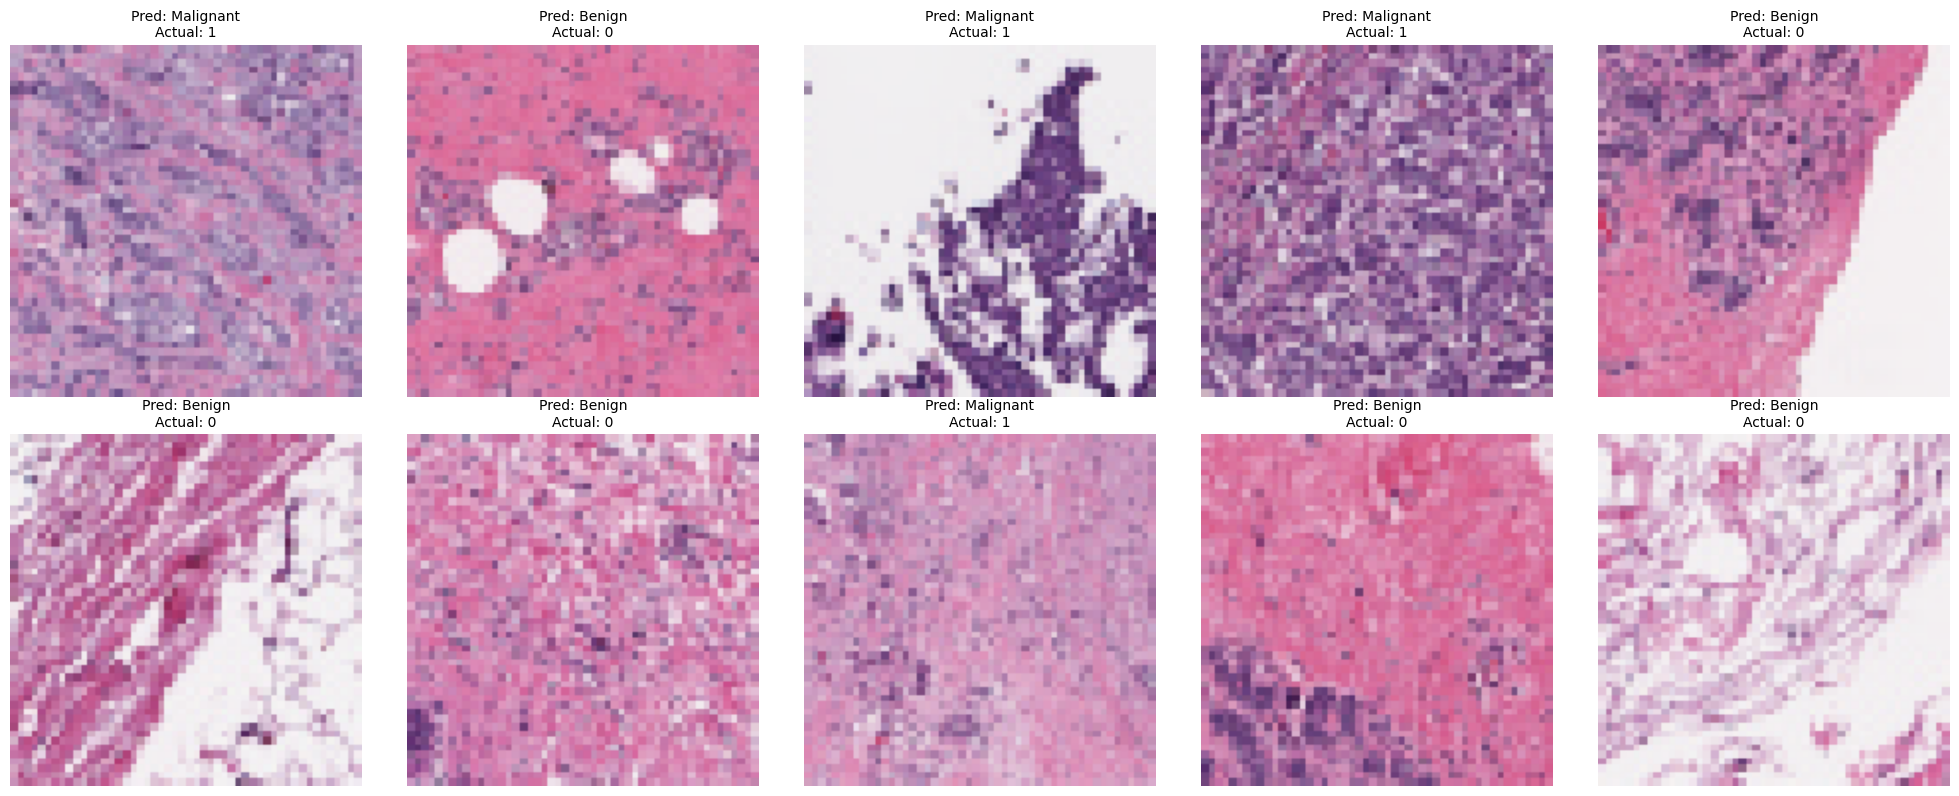

In [143]:
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get file paths from test generator
test_file_paths = test_gen.filepaths   # use your test generator
class_labels = list(test_gen.class_indices.keys())

# Select 10 random images
sample_paths = random.sample(test_file_paths, 10)

plt.figure(figsize=(20, 8))
for i, img_path in enumerate(sample_paths):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))  # match your model input
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)  # add batch dimension
    
    # Make prediction
    pred_prob = model.predict(img_array_exp)
    
    # Binary classification: threshold at 0.5
    pred_class = class_labels[int(pred_prob[0][0] > 0.5)]
    
    # True label from file path
    true_class = os.path.basename(os.path.dirname(img_path))
    
    # Plot image with prediction and true label
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_class}\nActual: {true_class}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [145]:
model.save("best_model.keras")

<h2 style="color:Red">Conclusion</h2>
<h3 style="color:Red">The CNN demonstrates strong and balanced performance overall:</h3>
<h4 style="color:blue">Accuracy: 87% — consistent across validation and test sets.

Benign: excellent recall (0.95) — model correctly identifies nearly all benign cases.

Malignant: high precision (0.92) but lower recall (0.79) — meaning some malignant cases are missed, though predictions made for this class are usually correct.

Overall F1-score (0.87): indicates solid generalization and a well-trained model.

The class weighting (Benign: 0.91, Malignant: 1.11) helped reduce bias, but there’s still a slight lean toward Benign detection.</h4>
<h3 style="color:Red">Future improvements</h3>
<h4 style="color:blue">Focus on boosting Malignant recall via data augmentation or threshold tuning,

Add more malignant samples if possible, or

Adjust class weights slightly to favor malignant cases.</h4>